In [143]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

csv_dir = '../../loan_data'

In [144]:
data_train = pd.read_csv(os.path.join(csv_dir,'application_train.csv'))
data_test = pd.read_csv(os.path.join(csv_dir,'application_test.csv'))

print(f'Train data shape : {data_train.shape}')
print(f'Test data shape : {data_test.shape}')

data_train.head()

Train data shape : (307511, 122)
Test data shape : (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


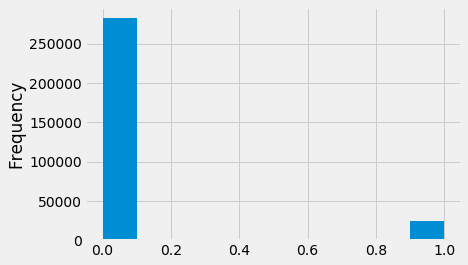

In [145]:
data_train['TARGET'].plot.hist()

In [146]:
def missing_value_table(df):

    #get total missing values
    missing_value = df.isnull().sum()
    
    #get the percentage of missing values
    missing_values_percentage = 100*missing_value/len(df)
    
    #Make a table with result
    miss_value_table = pd.concat([missing_value , missing_values_percentage] , axis = 1)
    
    #Rename table column
    miss_value_table.rename(columns = {
        0: "Missing Counts",
        1: "Missing Percentage"
    } , inplace = True)
    
    #Sort the table
    miss_value_table = miss_value_table[miss_value_table.iloc[: , 1]!=0].sort_values('Missing Percentage' , ascending = False )
    
    #Print the information
    print("The selected dataframe has " + str(df.shape[1]) + "Columns. \n"
         "There are " +str(miss_value_table.shape[0]) + " columns have a missing values.")
    
    return miss_value_table

In [147]:
missing_values = missing_value_table(data_train)
# missing_values

The selected dataframe has 122Columns. 
There are 67 columns have a missing values.


In [148]:
drop_selected_column = ['COMMONAREA_MEDI',
                        'COMMONAREA_MODE',
                        'NONLIVINGAPARTMENTS_MEDI',
                        'NONLIVINGAPARTMENTS_MODE',
                        'FONDKAPREMONT_MODE',
                        'LIVINGAPARTMENTS_MODE',
                        'LIVINGAPARTMENTS_MEDI',
                        'FLOORSMIN_MODE',
                        'FLOORSMIN_MEDI',
                        'YEARS_BUILD_MODE' ,
                         'YEARS_BUILD_MEDI',
                        'LANDAREA_MEDI',
                         'LANDAREA_MODE',
                        'BASEMENTAREA_MEDI',
                        'BASEMENTAREA_MODE',
                        'NONLIVINGAREA_MEDI',
                        'NONLIVINGAREA_MODE',
                        'ELEVATORS_MEDI',
                        'ELEVATORS_MODE',
                        'WALLSMATERIAL_MODE',
                        'APARTMENTS_MODE',
                        'APARTMENTS_MEDI',
                        'ENTRANCES_MODE',
                        'ENTRANCES_MEDI',
                        'LIVINGAREA_MEDI',
                        'LIVINGAREA_MODE',
                        'FLOORSMAX_MEDI',
                        'FLOORSMAX_MODE',
                        'YEARS_BEGINEXPLUATATION_MEDI',
                        'YEARS_BEGINEXPLUATATION_MODE',
                        'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_DAY',
                        'AMT_REQ_CREDIT_BUREAU_MON',
                        'AMT_REQ_CREDIT_BUREAU_QRT',
                        'AMT_REQ_CREDIT_BUREAU_HOUR',
                        'OBS_30_CNT_SOCIAL_CIRCLE',
                        'DEF_30_CNT_SOCIAL_CIRCLE',
                        'OBS_60_CNT_SOCIAL_CIRCLE',
                        'DEF_60_CNT_SOCIAL_CIRCLE',
                        'SK_ID_CURR',
                        'AMT_REQ_CREDIT_BUREAU_YEAR']


In [149]:
def drop_colm(df):
    df.drop(drop_selected_column , axis = 1, inplace = True)

In [150]:
drop_colm(data_train)
drop_colm(data_test)

In [151]:
data_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# Retrieve all the data of the column starting with “FLAG_DOCUMENT” 

def get_docs_count(df):
    df['DOCS_COUNT'] = df.filter(regex = '^(FLAG_DOCUMENT)').sum(axis = 1)
    
    drop_these = df.filter(regex = '^(FLAG_DOCUMENT)').columns
    
    df.drop(drop_these , axis = 1, inplace = True)


In [153]:
get_docs_count(data_train)
get_docs_count(data_test)

In [154]:
print(data_train.shape)
print(data_test.shape)

(307511, 62)
(48744, 61)


In [155]:
data_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,DOCS_COUNT
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.0369,0.0202,0.0190,0.0000,0.0000,block of flats,0.0149,No,-1134.0,1
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0130,0.0773,0.0549,0.0039,0.0098,block of flats,0.0714,No,-828.0,1
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-815.0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-617.0,1
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1106.0,1


In [156]:
missing_values = missing_value_table(data_train)
missing_values

The selected dataframe has 62Columns. 
There are 27 columns have a missing values.


,Missing Counts,Missing Percentage
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_AVG,213514,69.432963
LIVINGAPARTMENTS_AVG,210199,68.354953
FLOORSMIN_AVG,208642,67.848630
YEARS_BUILD_AVG,204488,66.497784
OWN_CAR_AGE,202929,65.990810
LANDAREA_AVG,182590,59.376738
BASEMENTAREA_AVG,179943,58.515956
EXT_SOURCE_1,173378,56.381073
NONLIVINGAREA_AVG,169682,55.179164


In [157]:
def impute_zero(df , col):
    for c in col:
        df[c] = df[c].fillna(0)

In [158]:
impute_zero(data_train , ['COMMONAREA_AVG', 'NONLIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_AVG', 'FLOORSMIN_AVG' , 'YEARS_BUILD_AVG' , 'LANDAREA_AVG','BASEMENTAREA_AVG','NONLIVINGAREA_AVG','ELEVATORS_AVG','APARTMENTS_AVG','ENTRANCES_AVG','LIVINGAREA_AVG','HOUSETYPE_MODE','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE','OWN_CAR_AGE'])
impute_zero(data_test , ['COMMONAREA_AVG', 'NONLIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_AVG', 'FLOORSMIN_AVG' , 'YEARS_BUILD_AVG' , 'LANDAREA_AVG','BASEMENTAREA_AVG','NONLIVINGAREA_AVG','ELEVATORS_AVG','APARTMENTS_AVG','ENTRANCES_AVG','LIVINGAREA_AVG','HOUSETYPE_MODE','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE' , 'OWN_CAR_AGE'])

In [159]:
missing_values = missing_value_table(data_train)
missing_values

The selected dataframe has 62Columns. 
There are 9 columns have a missing values.


,Missing Counts,Missing Percentage
EXT_SOURCE_1,173378,56.381073
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307
NAME_TYPE_SUITE,1292,0.420148
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650
DAYS_LAST_PHONE_CHANGE,1,0.000325


In [160]:
#Unique Entries of the object(Catagorical) Column
def get_unique_catagory(df):
    return df.select_dtypes('object').apply(pd.Series.nunique , axis=0)

get_unique_catagory(data_train)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 4
EMERGENCYSTATE_MODE            3
dtype: int64

In [161]:
data_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,DOCS_COUNT
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.0369,0.0202,0.0190,0.0000,0.0000,block of flats,0.0149,No,-1134.0,1
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0130,0.0773,0.0549,0.0039,0.0098,block of flats,0.0714,No,-828.0,1
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-815.0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-617.0,1
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-1106.0,1


In [162]:
#NAME_CONTRACT_TYPE ->catagorical to numerical

contract_type = {
    'Cash loans':0,
    'Revolving loans':1
}
data_train.NAME_CONTRACT_TYPE = [contract_type[item] for item in data_train.NAME_CONTRACT_TYPE]


data_test.NAME_CONTRACT_TYPE = [contract_type[item] for item in data_test.NAME_CONTRACT_TYPE]



In [163]:
item_counts = data_train["CODE_GENDER"].value_counts()

item_counts

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [164]:
gender = {
    'M' : 0,
    'F' : 1,
    'XNA' : 1
}

data_train.CODE_GENDER = [gender[item] for item in data_train.CODE_GENDER]

data_test.CODE_GENDER = [gender[item] for item in data_test.CODE_GENDER]

In [165]:
flags = {
    'N' : 0,
    'Y' : 1
}

data_test.FLAG_OWN_REALTY = [flags[item] for item in data_test.FLAG_OWN_REALTY]

data_train.FLAG_OWN_REALTY = [flags[item] for item in data_train.FLAG_OWN_REALTY]



data_test.FLAG_OWN_CAR = [flags[item] for item in data_test.FLAG_OWN_CAR]

data_train.FLAG_OWN_CAR = [flags[item] for item in data_train.FLAG_OWN_CAR]




In [166]:
data_train.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,DOCS_COUNT
0,1,0,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0369,0.0202,0.0190,0.0000,0.0000,block of flats,0.0149,No,-1134.0,1
1,0,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0130,0.0773,0.0549,0.0039,0.0098,block of flats,0.0714,No,-828.0,1
2,0,1,0,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-815.0,0
3,0,0,1,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-617.0,1
4,0,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-1106.0,1


In [167]:
item_counts = data_train["EMERGENCYSTATE_MODE"].value_counts()
item_counts

No     159428
0      145755
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [168]:
newflags = {
    'No' : 0,
    'Yes' : 1,
    0 :0
}

data_train.EMERGENCYSTATE_MODE = [newflags[item] for item in data_train.EMERGENCYSTATE_MODE]

data_test.EMERGENCYSTATE_MODE = [newflags[item] for item in data_test.EMERGENCYSTATE_MODE]

In [169]:
data_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,DOCS_COUNT
0,1,0,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0369,0.0202,0.0190,0.0000,0.0000,block of flats,0.0149,0,-1134.0,1
1,0,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0130,0.0773,0.0549,0.0039,0.0098,block of flats,0.0714,0,-828.0,1
2,0,1,0,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-815.0,0
3,0,0,1,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-617.0,1
4,0,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-1106.0,1


In [170]:
# car = pd.DataFrame()
# car['flag'] = data_train['FLAG_OWN_CAR']
# car['age'] = data_train['OWN_CAR_AGE']

# car[(car['flag'] == 0) &  (car['age']  > 0)] #shouls be empty

# a = car[(car['age']==0)  & (car['flag'] == 1)] #Should be empty else we will update age as 0.5

# select_row = a.index

# #Updating  the selected rows in the dataframe
# data_train.at[select_row,'OWN_CAR_AGE']=0.5

def car_data(df):
    car = pd.DataFrame()
    car['flag'] = df['FLAG_OWN_CAR']
    car['age'] = df['OWN_CAR_AGE']
    
    car[(car['flag'] == 0) &  (car['age']  > 0)] #shouls be empty

    a = car[(car['age']==0)  & (car['flag'] == 1)] #Should be empty else we will update age as 0.5
    
    select_row = a.index
    
    #Updating  the selected rows in the dataframe
    df.at[select_row,'OWN_CAR_AGE']=0.5
    
    # Deleting the 'FLAG_OWN_CAR' column as the data on is represented on 'OWN_CAR_AGE'
    df.drop(['OWN_CAR_AGE'] , axis = 1, inplace = True)
    
    #Delete the car dataframe
    del car

car_data(data_train)
car_data(data_test)
         

# # Deleting the 'FLAG_OWN_CAR' column as the data on is represented on 'OWN_CAR_AGE'
# data_train.drop(['OWN_CAR_AGE'] , axis = 1, inplace = True)




# #Delete the car dataframe
# del car



In [171]:
data_train.shape

(307511, 61)

In [172]:
item_counts = data_train["CNT_CHILDREN"].value_counts()
item_counts

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [173]:
child = pd.DataFrame()

child['count'] = data_train[(data_train['CNT_CHILDREN'] > 7)]['CNT_CHILDREN']
child['lives_with'] = data_train.loc[child.index,'NAME_TYPE_SUITE'] 

child


,count,lives_with
12615,8,Unaccompanied
23881,9,Unaccompanied
34545,11,Unaccompanied
80948,12,Family
132585,10,Unaccompanied
154317,8,Family
155369,19,Family
171125,12,Family
176011,14,Children
183878,14,Unaccompanied


In [174]:
data_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,DOCS_COUNT
0,1,0,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.0369,0.0202,0.0190,0.0000,0.0000,block of flats,0.0149,0,-1134.0,1
1,0,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0130,0.0773,0.0549,0.0039,0.0098,block of flats,0.0714,0,-828.0,1
2,0,1,0,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-815.0,0
3,0,0,1,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-617.0,1
4,0,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0,-1106.0,1


In [175]:
# data_train['NAME_TYPE_SUITE'] = data_train['NAME_TYPE_SUITE'].fillna(0)

a = data_train.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
a ['NAME_FAMILY_STATUS']


TARGET                    0.010696
NAME_CONTRACT_TYPE       -0.024440
CODE_GENDER               0.132359
FLAG_OWN_CAR             -0.083466
FLAG_OWN_REALTY          -0.024312
                            ...   
HOUSETYPE_MODE           -0.022139
TOTALAREA_MODE            0.007338
EMERGENCYSTATE_MODE       0.005936
DAYS_LAST_PHONE_CHANGE    0.009126
DOCS_COUNT               -0.028922
Name: NAME_FAMILY_STATUS, Length: 61, dtype: float64

In [176]:
a.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
    

In [177]:
data = pd.DataFrame()
data['children'] = data_train['CNT_CHILDREN']
data['suite'] = data_train['NAME_TYPE_SUITE']
data['housing'] = data_train['NAME_HOUSING_TYPE']
data['status'] = data_train['NAME_FAMILY_STATUS']
data['income'] = data_train['NAME_INCOME_TYPE']
data['education'] = data_train['NAME_EDUCATION_TYPE']
data['occupation'] = data_train['OCCUPATION_TYPE']
data['organization'] = data_train['ORGANIZATION_TYPE']    

In [178]:
data.head(2)

,children,suite,housing,status,income,education,occupation,organization
0,0,Unaccompanied,House / apartment,Single / not married,Working,Secondary / secondary special,Laborers,Business Entity Type 3
1,0,Family,House / apartment,Married,State servant,Higher education,Core staff,School


In [179]:
a = data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

Text(0.5, 1, 'Corelation heatmap')

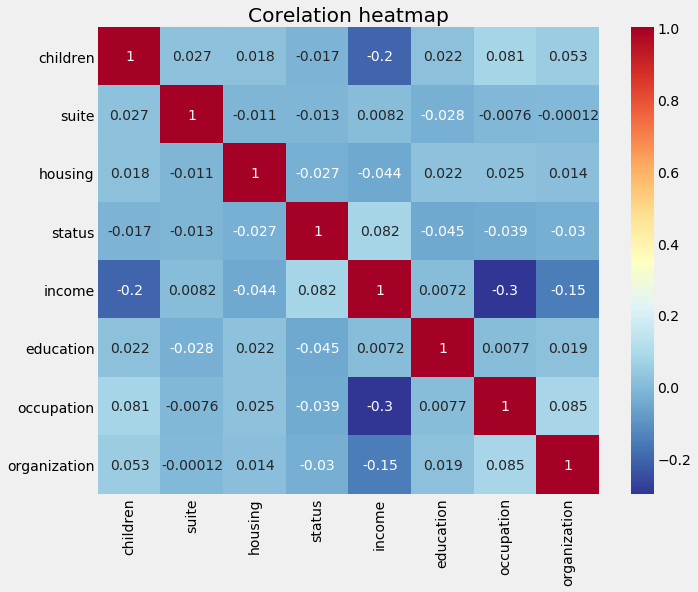

In [180]:
plt.figure(figsize=(10,8))
sns.heatmap(a , cmap = plt.cm.RdYlBu_r , annot=True)
plt.title("Corelation heatmap")

In [181]:
dictn = {
    'Spouse, partner' : 'Family',
    'Children' : 'Family',
    'Family' : 'Family',
    'Unaccompanied' : 'Unaccompanied',
    'Other_A' : 'Group',
    'Other_B' : 'Group',
    'Group of people' : 'Group',
    np.nan : 'Amissing'
}

data_train.NAME_TYPE_SUITE = [dictn[item] for item in data_train.NAME_TYPE_SUITE]
data_test.NAME_TYPE_SUITE = [dictn[item] for item in data_test.NAME_TYPE_SUITE]

In [182]:
item_counts = data_train["NAME_TYPE_SUITE"].value_counts()
item_counts

Unaccompanied    248526
Family            54786
Group              2907
Amissing           1292
Name: NAME_TYPE_SUITE, dtype: int64

In [183]:
# One hot encoding
data_train = pd.get_dummies(data_train, columns=['NAME_TYPE_SUITE'], drop_first=True,  prefix='SUITE',)
data_test = pd.get_dummies(data_test, columns=['NAME_TYPE_SUITE'], drop_first=True,  prefix='SUITE',)

# Drop NAME_TYPE_SUITE column
# data_train.drop(['NAME_TYPE_SUITE'] , axis = 1, inplace = True) #No need to drop as one hot encoding does for us

In [184]:
get_unique_catagory(data_train)

NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 4
dtype: int64

In [185]:
missing_value_table(data_train)

The selected dataframe has 63Columns. 
There are 8 columns have a missing values.


,Missing Counts,Missing Percentage
EXT_SOURCE_1,173378,56.381073
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650
DAYS_LAST_PHONE_CHANGE,1,0.000325


In [186]:
# NAME_INCOME_TYPE               

item_counts = data_train["NAME_INCOME_TYPE"].value_counts()
item_counts

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [187]:
data_train["NAME_INCOME_TYPE"].isnull().sum()

0

0    14
1     8
Name: target, dtype: int64


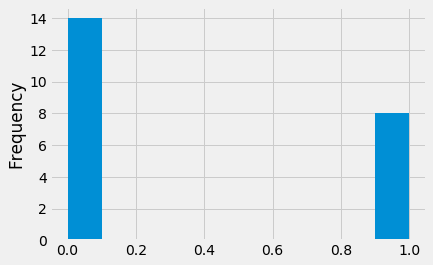

In [188]:
newda = pd.DataFrame()
newda['pension'] = data_train[(data_train['NAME_INCOME_TYPE'] == 'Unemployed')]['NAME_INCOME_TYPE']
newda['target'] =  data_train.loc[newda.index,'TARGET'] 

print(newda["target"].value_counts())

newda['target'].plot.hist()

In [189]:
newflags = {
    'Working' : 2 ,
    'Commercial associate' : 3,
    'Businessman' : 3,
    'Pensioner' : 1,
    'State servant' : 4,
    'Unemployed' : 0,
    'Student' : 0,
    'Maternity leave' : 1,
}

data_train.NAME_INCOME_TYPE = [newflags[item] for item in data_train.NAME_INCOME_TYPE]
data_test.NAME_INCOME_TYPE = [newflags[item] for item in data_test.NAME_INCOME_TYPE]

In [190]:
# NAME_INCOME_TYPE               

item_counts = data_train["NAME_INCOME_TYPE"].value_counts()
item_counts

2    158774
3     71627
1     55367
4     21703
0        40
Name: NAME_INCOME_TYPE, dtype: int64

In [191]:
# NAME_EDUCATION_TYPE    
 
item_counts = data_train["NAME_EDUCATION_TYPE"].value_counts()
item_counts

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [192]:
newflags = {
    'Secondary / secondary special' : 0 ,
    'Higher education' : 1,
    'Incomplete higher' : 2,
    'Lower secondary' : 3,
    'Academic degree' : 4
}

data_train.NAME_EDUCATION_TYPE = [newflags[item] for item in data_train.NAME_EDUCATION_TYPE]

data_test.NAME_EDUCATION_TYPE = [newflags[item] for item in data_test.NAME_EDUCATION_TYPE]

In [193]:
# NAME_EDUCATION_TYPE    
 
item_counts = data_train["NAME_EDUCATION_TYPE"].value_counts()
item_counts

0    218391
1     74863
2     10277
3      3816
4       164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [194]:
#get avg salary for every occupation

def get_sal(df , col , item_counts):
    avg = []
    for c in item_counts.index:
        a = df[(df[col] == c)]['AMT_ANNUITY'].mean()
        avg.append(a)
    return avg

In [195]:
# OCCUPATION_TYPE            

item_counts = data_train["OCCUPATION_TYPE"].value_counts()
item_counts

dtable= pd.DataFrame(data=item_counts)

avrg = get_sal(data_train , 'OCCUPATION_TYPE' ,item_counts )
    
dtable['AVERAGE INCOME'] = avrg

In [196]:
dtable = dtable.sort_values(by=['AVERAGE INCOME'])
dtable

,OCCUPATION_TYPE,AVERAGE INCOME
Cleaning staff,4653,22901.733075
Low-skill Laborers,2093,23235.564023
Waiters/barmen staff,1348,24256.729228
Security staff,6721,25065.525000
Cooking staff,5946,25082.813793
Medicine staff,8537,25872.590265
Sales staff,32102,26130.588533
Laborers,55186,26441.027001
Secretaries,1305,26853.325537
Core staff,27570,27557.864032


In [197]:
dtable.index

Index(['Cleaning staff', 'Low-skill Laborers', 'Waiters/barmen staff',
       'Security staff', 'Cooking staff', 'Medicine staff', 'Sales staff',
       'Laborers', 'Secretaries', 'Core staff', 'High skill tech staff',
       'IT staff', 'Drivers', 'Private service staff', 'HR staff',
       'Realty agents', 'Accountants', 'Managers'],
      dtype='object')

In [198]:
def get_flag(dtable):
    flags = {0:0 ,}
    for data in dtable.index:
        newdata = dtable.loc[data ,'AVERAGE INCOME']
        if(newdata < 25000):
            flags[data] = (1)
        elif((newdata > 25000) & (newdata <27000)):
            flags[data] = (2)
        elif((newdata > 27000) & (newdata < 30000)):
            flags[data] = (3)
        else:
            flags[data] = (4)
    return flags   

In [199]:
job_flags = get_flag(dtable)

In [200]:
#fill all nan with 0
data_train['OCCUPATION_TYPE'] = data_train['OCCUPATION_TYPE'].fillna(0)
data_test['OCCUPATION_TYPE'] = data_test['OCCUPATION_TYPE'].fillna(0)


#ordinal encoding
data_train.OCCUPATION_TYPE = [job_flags[item] for item in data_train.OCCUPATION_TYPE]
data_test.OCCUPATION_TYPE = [job_flags[item] for item in data_test.OCCUPATION_TYPE]

In [201]:
# Corelation  between occupation type, Education and NAME_INCOME_TYPE

test_data = data_train[['TARGET' , 'OCCUPATION_TYPE' , 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']]

tst_crr = test_data.corr()

tst_crr


,TARGET,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE
TARGET,1.000000,0.009693,0.000702,-0.032434
OCCUPATION_TYPE,0.009693,1.000000,0.460528,0.125433
NAME_INCOME_TYPE,0.000702,0.460528,1.000000,0.125633
NAME_EDUCATION_TYPE,-0.032434,0.125433,0.125633,1.000000


Text(0.5, 1, 'Corelation heatmap')

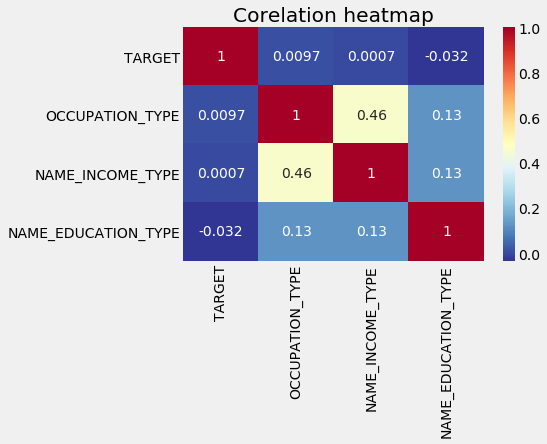

In [202]:
sns.heatmap(tst_crr , cmap = plt.cm.RdYlBu_r , annot=True)
plt.title("Corelation heatmap")

In [203]:
# ORGANIZATION_TYPE            

item_counts = data_train["ORGANIZATION_TYPE"].value_counts()
item_counts

dtable= pd.DataFrame(data=item_counts)

avrg = get_sal(data_train , 'ORGANIZATION_TYPE' ,item_counts )
    
dtable['AVERAGE INCOME'] = avrg

dtable = dtable.sort_values(by=['AVERAGE INCOME'])
dtable

,ORGANIZATION_TYPE,AVERAGE INCOME
Postal,2157,23799.675939
XNA,55374,23904.303202
Mobile,317,25033.996845
Agriculture,2454,25036.301956
Industry: type 3,3278,25076.174497
Kindergarten,6880,25142.358140
Trade: type 2,1900,25265.856316
Cleaning,260,25670.215385
Trade: type 3,3492,25836.738402
Emergency,560,25955.027679


In [204]:
data_train["ORGANIZATION_TYPE"].isnull().sum()

0

In [205]:
job_flags = get_flag(dtable)
#ordinal encoding
data_train.ORGANIZATION_TYPE = [job_flags[item] for item in data_train.ORGANIZATION_TYPE]

data_test.ORGANIZATION_TYPE = [job_flags[item] for item in data_test.ORGANIZATION_TYPE]

In [206]:
# Corelation  between occupation type, Education and NAME_INCOME_TYPE

test_data = data_train[['TARGET' , 'ORGANIZATION_TYPE' ,'OCCUPATION_TYPE' , 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']]

tst_crr = test_data.corr()

tst_crr


,TARGET,ORGANIZATION_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE
TARGET,1.000000,0.044924,0.009693,0.000702,-0.032434
ORGANIZATION_TYPE,0.044924,1.000000,0.465108,0.528189,0.072693
OCCUPATION_TYPE,0.009693,0.465108,1.000000,0.460528,0.125433
NAME_INCOME_TYPE,0.000702,0.528189,0.460528,1.000000,0.125633
NAME_EDUCATION_TYPE,-0.032434,0.072693,0.125433,0.125633,1.000000


Text(0.5, 1, 'Corelation heatmap')

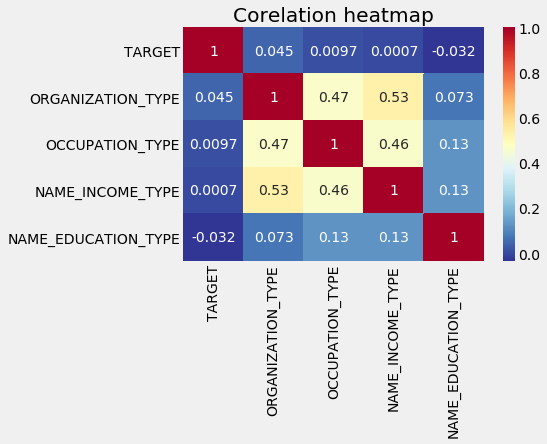

In [207]:
sns.heatmap(tst_crr , cmap = plt.cm.RdYlBu_r , annot=True)
plt.title("Corelation heatmap")

In [208]:
item_counts = data_train["HOUSETYPE_MODE"].value_counts()
item_counts

0                   154297
block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [209]:
def get_count(df , col):
    one_count = []
    zero_count = []
    
    for c in (df.index):
        a = data_train[(data_train[col] == c)]['TARGET'].value_counts()
        
#         if loop vitra if elif lagauda  kamm gareko xaina
        
        if(len(a.index) == 2):
            if(a.index[0] == 0):
                zero_count.append(a[0])
            if(a.index[0] == 1):
                one_count.append(a[0])
            if(a.index[1] == 0):
                zero_count.append(a[1])
            if(a.index[1] == 1):
                one_count.append(a[1])
        
        else:
            if(a.index[0] == 0):
                zero_count.append(a[0])
            else:
                zero_count.append(0)
            if(a.index[0] == 1):
                one_count.append(a[0])
            else:
                one_count.append(0)
            
#     print(one_count , zero_count)
            
        
#         one_count.append(a[1])
#         zero_count.append(a[0])
    
    df['one_count'] = one_count
    df['zero_count'] = zero_count

In [210]:
# HOUSETYPE_MODE            

item_counts = data_train["HOUSETYPE_MODE"].value_counts()
item_counts

dtable= pd.DataFrame(data=item_counts)

avrg = get_sal(data_train , 'HOUSETYPE_MODE' ,item_counts )
    
dtable['AVERAGE INCOME'] = avrg

get_count(dtable , 'HOUSETYPE_MODE')

dtable

,HOUSETYPE_MODE,AVERAGE INCOME,one_count,zero_count
0,154297,26150.155207,14120,140177
block of flats,150503,28097.366668,10450,140053
specific housing,1499,26081.291528,152,1347
terraced house,1212,27607.693069,103,1109


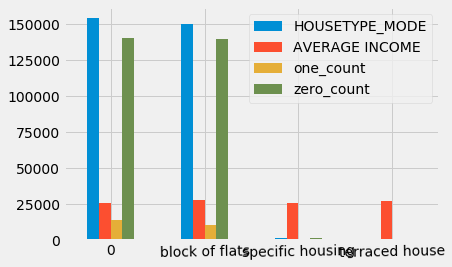

In [211]:
dtable.plot.bar(rot=True)

In [212]:
#put 0 for 0 and block of flats and put specific housing and trraced house under 1

newflags = {
    'block of flats' : 0 ,
    'specific housing' : 1,
    'terraced house' : 1,
    0: 0
}

data_train.HOUSETYPE_MODE = [newflags[item] for item in data_train.HOUSETYPE_MODE]
data_test.HOUSETYPE_MODE = [newflags[item] for item in data_test.HOUSETYPE_MODE]

In [213]:
# NAME_FAMILY_STATUS             

item_counts = data_train["NAME_FAMILY_STATUS"].value_counts()
item_counts

dtable= pd.DataFrame(data=item_counts)

get_count(dtable , 'NAME_FAMILY_STATUS')

dtable['paid_precentage'] = 100*dtable['one_count']/dtable['NAME_FAMILY_STATUS']

dtable

,NAME_FAMILY_STATUS,one_count,zero_count,paid_precentage
Married,196432,14850,181582,7.559868
Single / not married,45444,4457,40987,9.807675
Civil marriage,29775,2961,26814,9.944584
Separated,19770,1620,18150,8.194234
Widow,16088,937,15151,5.824217
Unknown,2,0,2,0.000000


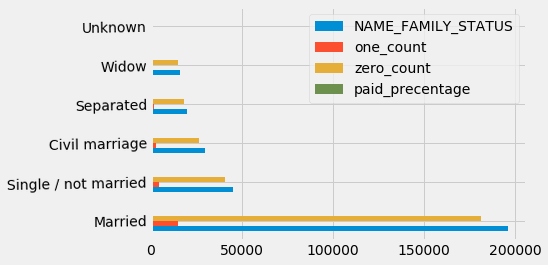

In [214]:

dtable.plot.barh(rot=True )

In [215]:
pd.get_dummies((dtable))

,NAME_FAMILY_STATUS,one_count,zero_count,paid_precentage
Married,196432,14850,181582,7.559868
Single / not married,45444,4457,40987,9.807675
Civil marriage,29775,2961,26814,9.944584
Separated,19770,1620,18150,8.194234
Widow,16088,937,15151,5.824217
Unknown,2,0,2,0.000000


In [216]:
data_train['NAME_FAMILY_STATUS'] =data_train['NAME_FAMILY_STATUS'].replace('Unknown', 'Widow')

data_test['NAME_FAMILY_STATUS'] =data_test['NAME_FAMILY_STATUS'].replace('Unknown', 'Widow')


item_counts = data_train["NAME_FAMILY_STATUS"].value_counts()
item_counts

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16090
Name: NAME_FAMILY_STATUS, dtype: int64

In [217]:
data_train = pd.get_dummies(data_train, columns=['NAME_FAMILY_STATUS'], prefix='FAMILY',)
data_test = pd.get_dummies(data_test, columns=['NAME_FAMILY_STATUS'], prefix='FAMILY',)

data_train.shape

(307511, 67)

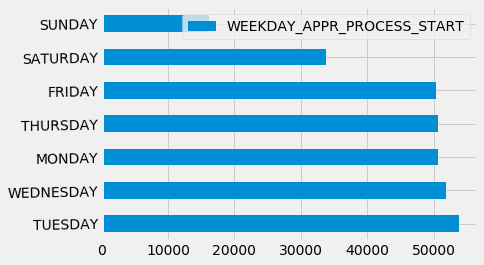

In [218]:
# WEEKDAY_APPR_PROCESS_START         

item_counts = data_train["WEEKDAY_APPR_PROCESS_START"].value_counts()
item_counts

dtable= pd.DataFrame(data=item_counts)


dtable.plot.barh(rot=True )

In [219]:
#We will drop the column as it doesnt seem to have a useful info to get the  targed values

data_test.drop(['WEEKDAY_APPR_PROCESS_START'] , axis = 1, inplace = True)
data_train.drop(['WEEKDAY_APPR_PROCESS_START'] , axis = 1, inplace = True)

In [220]:
# NAME_HOUSING_TYPE     

item_counts = data_train["NAME_HOUSING_TYPE"].value_counts()
item_counts

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [221]:
dtable= pd.DataFrame(data=item_counts)

get_count(dtable , 'NAME_HOUSING_TYPE')

dtable['paid_precentage'] = 100*dtable['one_count']/dtable['NAME_HOUSING_TYPE']

dtable

,NAME_HOUSING_TYPE,one_count,zero_count,paid_precentage
House / apartment,272868,21272,251596,7.795711
With parents,14840,1736,13104,11.698113
Municipal apartment,11183,955,10228,8.539748
Rented apartment,4881,601,4280,12.313051
Office apartment,2617,172,2445,6.572411
Co-op apartment,1122,89,1033,7.932264


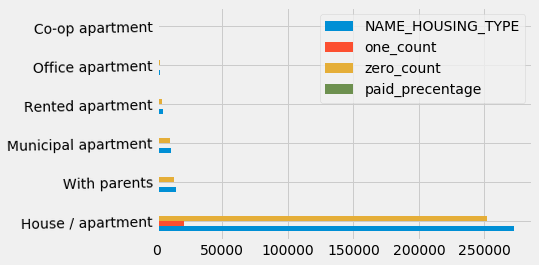

In [222]:
dtable.plot.barh(rot=True)

In [223]:
data_train = pd.get_dummies(data_train, columns=['NAME_HOUSING_TYPE'], prefix='HOUSING',)

data_test = pd.get_dummies(data_test, columns=['NAME_HOUSING_TYPE'], prefix='HOUSING',)



data_train.shape

(307511, 71)

In [224]:
a =missing_value_table(data_train)

The selected dataframe has 71Columns. 
There are 7 columns have a missing values.


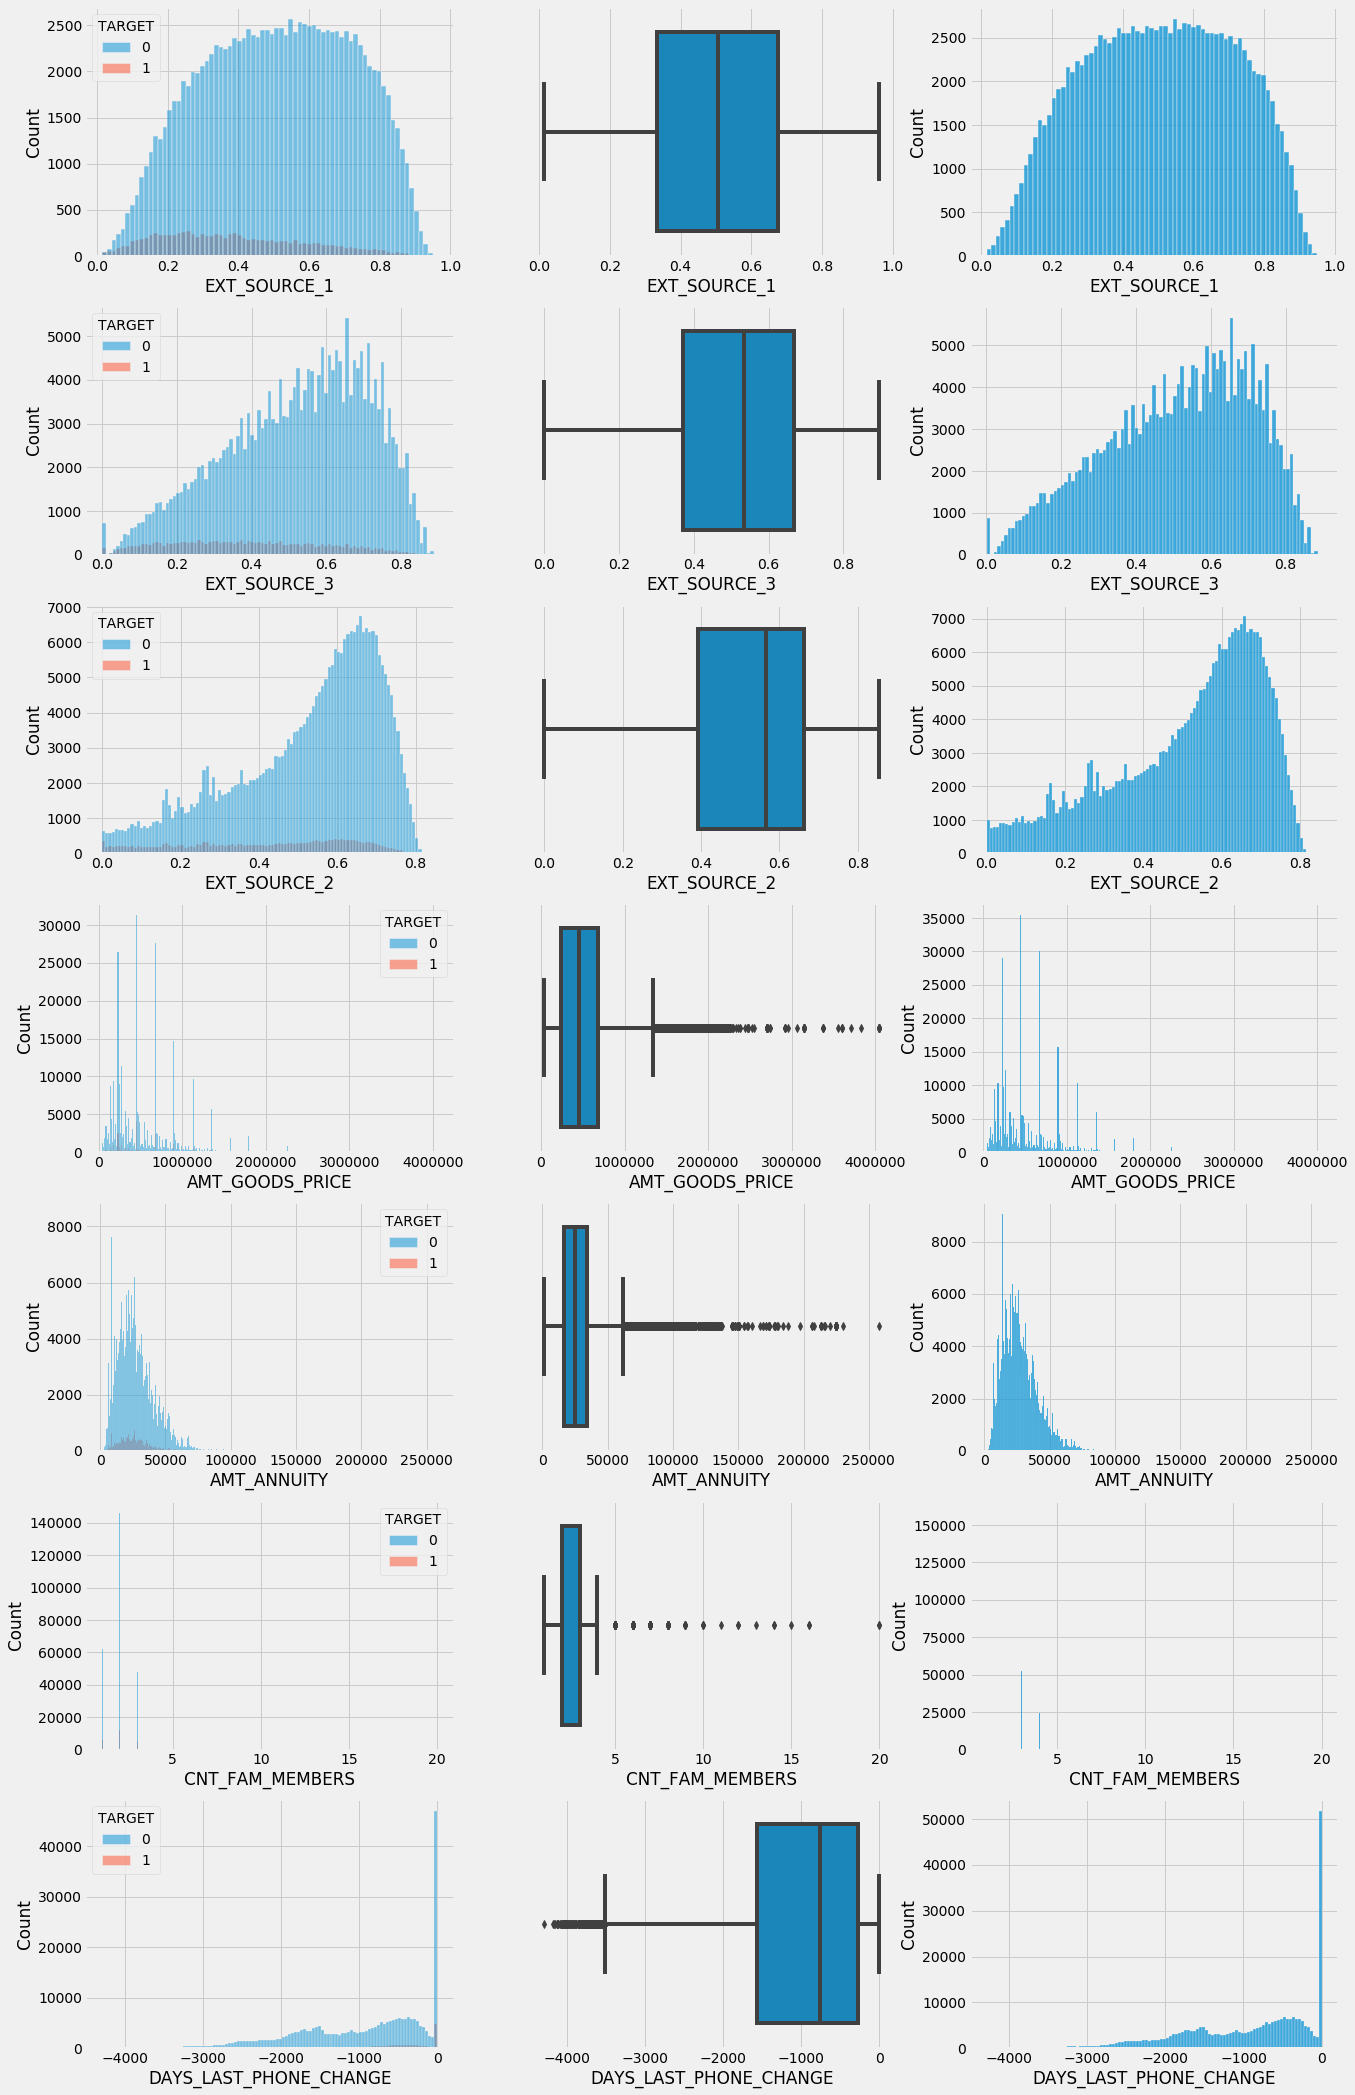

In [225]:
fig, axs = plt.subplots(ncols=3 , nrows=7, figsize=(20, 35))

colm = list(a.index)

k = 0
for i in range(0,7):
  for j in range(0,1):
    sns.histplot(data = data_train, hue='TARGET' ,x=colm[k], ax=axs[i][j])
    sns.histplot(data = data_train,x=colm[k], ax=axs[i][j +2])
    sns.boxplot(data = data_train,x=colm[k], ax=axs[i][j+1])

    k = k +1

(307511, 7)

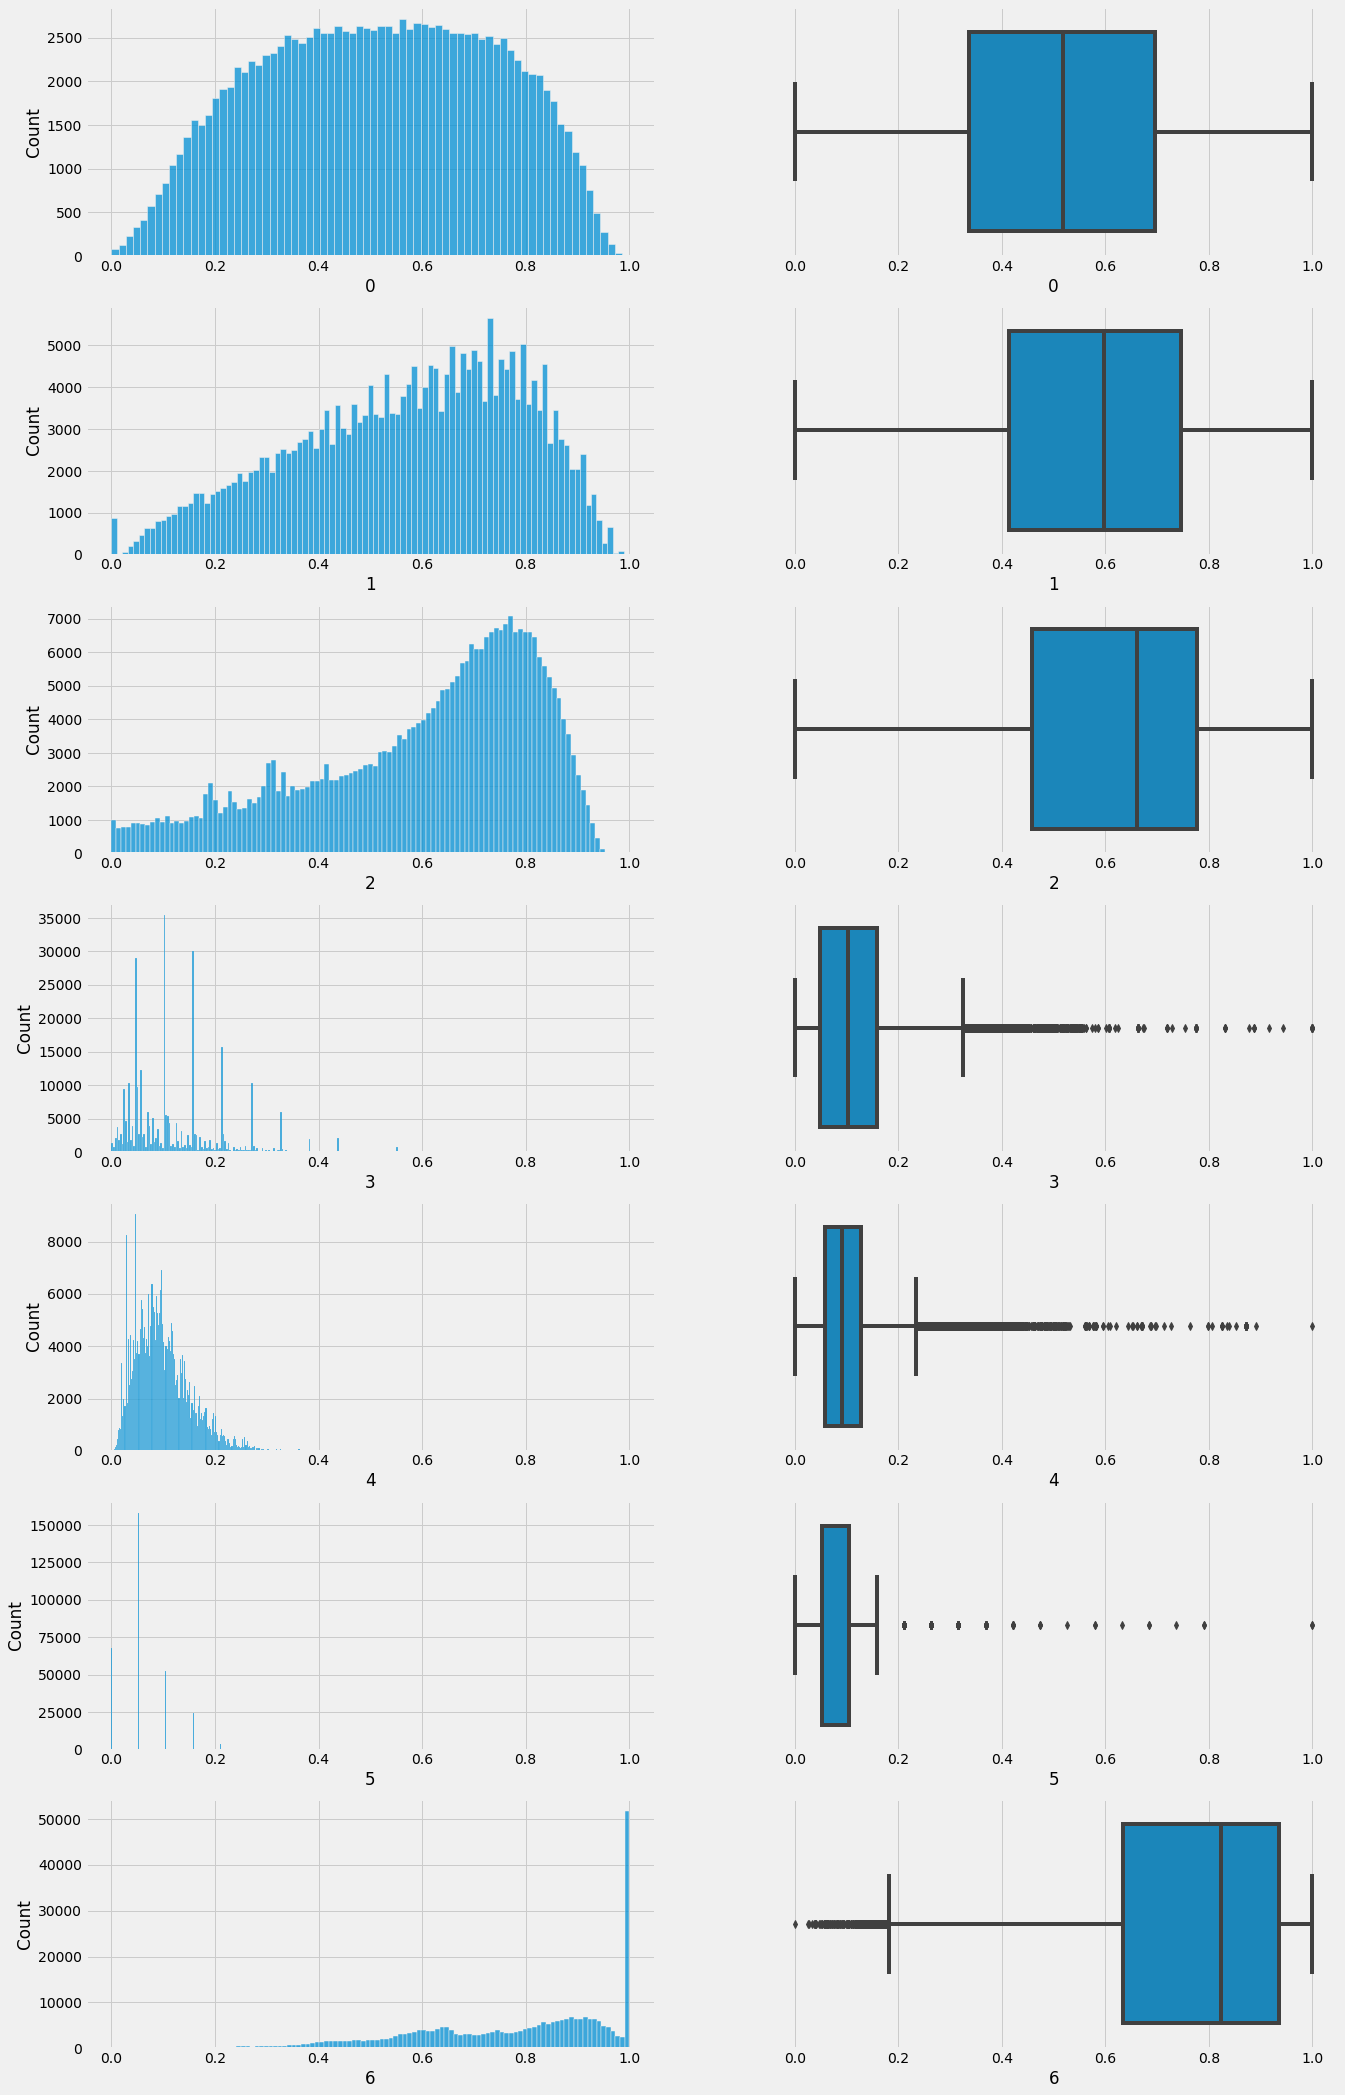

In [226]:
from sklearn import preprocessing

colm = list(a.index)
x = data_train[colm].values  #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


colm = list(df.index)
fig, axs = plt.subplots(ncols=2 , nrows=7, figsize=(20, 35))

k = 0
for i in range(0,7):
  for j in range(0,1):
    sns.boxplot(data = df,x=colm[k], ax=axs[i][j+1])
    sns.histplot(data = df ,x=colm[k], ax=axs[i][j])
    k = k +1
x.shape

In [227]:
def impute_mean(df , col):
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)
#     print(mean)
    
def impute_median(df , col):
    med = df[col].median()
    df[col] = df[col].fillna(med)
#     print(med)

def impute_mode(df, col):
    mode = df[col].mode()
    df[col] = df[col].fillna(mode[0])
#     print(mode[0])

In [228]:
data_train['AMT_GOODS_PRICE'].corr(data_train['AMT_ANNUITY'])

0.7751092733120264

In [229]:
new_crr = data_train[['AMT_GOODS_PRICE' , 'AMT_ANNUITY' , 'EXT_SOURCE_1' , 'EXT_SOURCE_2' , 'EXT_SOURCE_3']]
new_crr.corr()

,AMT_GOODS_PRICE,AMT_ANNUITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
AMT_GOODS_PRICE,1.000000,0.775109,0.175502,0.139367,0.047717
AMT_ANNUITY,0.775109,1.000000,0.119398,0.125804,0.030752
EXT_SOURCE_1,0.175502,0.119398,1.000000,0.213982,0.186846
EXT_SOURCE_2,0.139367,0.125804,0.213982,1.000000,0.109167
EXT_SOURCE_3,0.047717,0.030752,0.186846,0.109167,1.000000


Text(0.5, 1, 'Corelation heatmap')

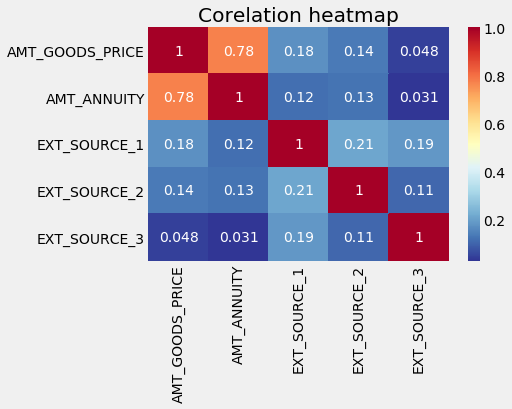

In [230]:
sns.heatmap(new_crr.corr() , cmap = plt.cm.RdYlBu_r , annot=True)
plt.title("Corelation heatmap")


In [231]:
#we can drop AMT_GOODS_PRICE colm as it is corelated with AMT_ANNUITY

data_train.drop(['AMT_GOODS_PRICE'] , axis = 1, inplace = True)
data_test.drop(['AMT_GOODS_PRICE'] , axis = 1, inplace = True)

In [232]:
missing_value_table(data_train)

The selected dataframe has 70Columns. 
There are 6 columns have a missing values.


,Missing Counts,Missing Percentage
EXT_SOURCE_1,173378,56.381073
EXT_SOURCE_3,60965,19.825307
EXT_SOURCE_2,660,0.214626
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650
DAYS_LAST_PHONE_CHANGE,1,0.000325


In [233]:
get_unique_catagory(data_train)

Series([], dtype: float64)

In [234]:
data_train.shape

(307511, 70)

In [235]:
data_train['DAYS_LAST_PHONE_CHANGE']=abs(data_train['DAYS_LAST_PHONE_CHANGE'])
data_train['DAYS_REGISTRATION']=abs(data_train['DAYS_REGISTRATION'])
data_train['DAYS_ID_PUBLISH']=abs(data_train['DAYS_ID_PUBLISH'])
data_train['DAYS_EMPLOYED']=abs(data_train['DAYS_EMPLOYED'])


data_test['DAYS_LAST_PHONE_CHANGE']=abs(data_test['DAYS_LAST_PHONE_CHANGE'])
data_test['DAYS_REGISTRATION']=abs(data_test['DAYS_REGISTRATION'])
data_test['DAYS_ID_PUBLISH']=abs(data_test['DAYS_ID_PUBLISH'])
data_test['DAYS_EMPLOYED']=abs(data_test['DAYS_EMPLOYED'])

In [236]:
impute_mean(data_train, 'EXT_SOURCE_1')
impute_median(data_train, 'EXT_SOURCE_2')
impute_median(data_train, 'EXT_SOURCE_3')
impute_mean(data_train, 'AMT_ANNUITY')
impute_median(data_train, 'CNT_FAM_MEMBERS')
impute_mode(data_train, 'DAYS_LAST_PHONE_CHANGE')

impute_mean(data_test, 'EXT_SOURCE_1')
impute_median(data_test, 'EXT_SOURCE_2')
impute_median(data_test, 'EXT_SOURCE_3')
impute_mean(data_test, 'AMT_ANNUITY')
impute_median(data_test, 'CNT_FAM_MEMBERS')
impute_mode(data_test, 'DAYS_LAST_PHONE_CHANGE')

In [237]:
missing_value_table(data_train)

The selected dataframe has 70Columns. 
There are 0 columns have a missing values.


,Missing Counts,Missing Percentage


In [238]:
missing_value_table(data_test)

The selected dataframe has 69Columns. 
There are 0 columns have a missing values.


,Missing Counts,Missing Percentage


In [239]:
get_unique_catagory(data_train)

Series([], dtype: float64)

In [240]:
get_unique_catagory(data_test)

Series([], dtype: float64)

In [241]:
# Effect of age on repayment

#find out the corelation of positive days since birth and target

data_train['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])
data_train['DAYS_BIRTH'].corr(data_train['TARGET'])


#as client gets older, there is negative linear regression with target.

-0.07823930830982712

Text(0, 0.5, 'Count')

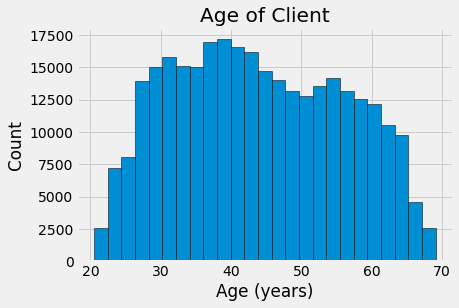

In [242]:
#Distribution of Age

plt.style.use('fivethirtyeight')

plt.hist(data_train['DAYS_BIRTH']/365 , edgecolor = 'k' , bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

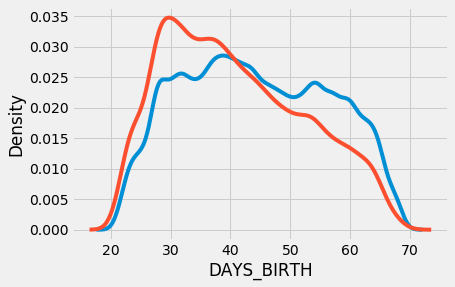

In [243]:
#Visualize the effect of age in the target

import seaborn as sns

# plt.figure(figsize=(10 , 8))

sns.kdeplot(data_train.loc[data_train['TARGET'] == 0 , 'DAYS_BIRTH']/365 , label = "target = 0")

sns.kdeplot(data_train.loc[data_train['TARGET'] == 1 , 'DAYS_BIRTH']/365 , label = "target = 1")

In [244]:
#Age information into seprate dataframe

age_data = data_train[['TARGET' , 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365

#Bin the age data
age_data['Year_binded'] = pd.cut(age_data['YEARS_BIRTH'] , bins = np.linspace(20 , 70 , num = 11))
age_data.head()

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,TARGET,DAYS_BIRTH,YEARS_BIRTH,Year_binded
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [245]:
age_group = age_data.groupby('Year_binded').mean()
age_group

,TARGET,DAYS_BIRTH,YEARS_BIRTH
Year_binded,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to repay by age group')

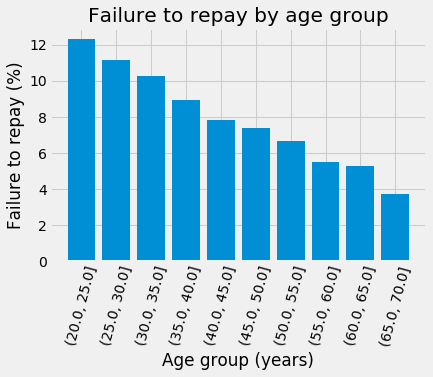

In [246]:
# plt.figure(figsize=(10, 12))

#Graph the age bins and the avg of the target as a barplot
plt.bar(age_group.index.astype(str) , 100*age_group['TARGET'])

#Plot labelling 
plt.xticks(rotation = 75)
plt.xlabel('Age group (years)')
plt.ylabel('Failure to repay (%)')

plt.title('Failure to repay by age group')

# There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.


In [247]:
correlation = data_train.corr()['TARGET'].sort_values()

In [248]:
#negative corelation
correlation[:35]

EXT_SOURCE_2                  -0.160295
EXT_SOURCE_3                  -0.155892
EXT_SOURCE_1                  -0.099152
DAYS_BIRTH                    -0.078239
DAYS_LAST_PHONE_CHANGE        -0.055217
CODE_GENDER                   -0.054713
DAYS_ID_PUBLISH               -0.051457
FLOORSMAX_AVG                 -0.049839
DAYS_EMPLOYED                 -0.047046
DAYS_REGISTRATION             -0.041975
TOTALAREA_MODE                -0.041037
YEARS_BEGINEXPLUATATION_AVG   -0.040965
LIVINGAREA_AVG                -0.040301
APARTMENTS_AVG                -0.039924
ENTRANCES_AVG                 -0.038402
REGION_POPULATION_RELATIVE    -0.037227
ELEVATORS_AVG                 -0.035853
FLOORSMIN_AVG                 -0.034177
BASEMENTAREA_AVG              -0.033759
YEARS_BUILD_AVG               -0.033073
NAME_EDUCATION_TYPE           -0.032434
NAME_CONTRACT_TYPE            -0.030896
AMT_CREDIT                    -0.030369
LIVINGAPARTMENTS_AVG          -0.029525
HOUSING_House / apartment     -0.028555


In [249]:
#Positive corelation
correlation[36:]

NONLIVINGAPARTMENTS_AVG       -0.005910
HOUSING_Office apartment      -0.005103
AMT_INCOME_TOTAL              -0.003982
FLAG_EMAIL                    -0.001758
HOUSING_Co-op apartment       -0.000312
FLAG_CONT_MOBILE               0.000370
FLAG_MOBIL                     0.000534
NAME_INCOME_TYPE               0.000702
FAMILY_Separated               0.001168
LIVE_REGION_NOT_WORK_REGION    0.002819
HOUSING_Municipal apartment    0.003329
HOUSETYPE_MODE                 0.004616
SUITE_Group                    0.004727
EMERGENCYSTATE_MODE            0.004829
REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
SUITE_Unaccompanied            0.008301
CNT_FAM_MEMBERS                0.009308
OCCUPATION_TYPE                0.009693
DOCS_COUNT                     0.017193
CNT_CHILDREN                   0.019187
HOUSING_Rented apartment       0.019767
FAMILY_Civil marriage          0.022496
FAMILY_Single / not married    0.026518
FLAG_WORK_PHONE                0.028524


In [250]:
from sklearn.linear_model import LogisticRegression

In [251]:
# !pip install imblearn

In [252]:
from imblearn.under_sampling import RandomUnderSampler

In [253]:
X = data_train.drop('TARGET' , axis =1)
y = data_train['TARGET']
under = RandomUnderSampler(sampling_strategy='majority')
X , y = under.fit_resample(X, y) 

In [254]:
X.shape

(49650, 69)

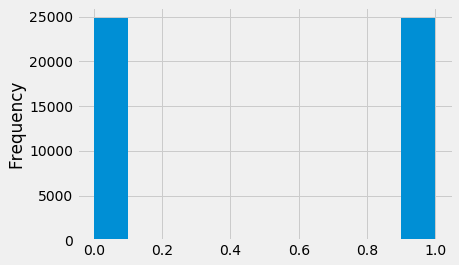

In [255]:
y.plot.hist()

In [256]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [257]:
X_CV = X[49000:]
y_CV = y[49000:]

X = X[:49000]
y = y[:49000]

In [258]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [259]:
clf = LogisticRegression(random_state=0).fit(X, y)
yhat = clf.predict(X)
accuracy_score(y, yhat)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5637551020408164

In [260]:
yhat = clf.predict(X_CV)
accuracy_score(y_CV, yhat)

0.5707692307692308

In [261]:
logi_pre = clf.predict(data_test)
df = pd.DataFrame(logi_pre)
df.to_csv('logistic.csv',index=False)

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
yhat = clf.predict(X)
clf.score(X, y)
# accuracy_score(y, yhat)

0.6598163265306123

In [264]:
yhat = clf.predict(X_CV)
accuracy_score(y_CV, yhat)

0.66

In [265]:
random = clf.predict(data_test)
df = pd.DataFrame(logi_pre)
df.to_csv('random.csv',index=False)

In [266]:
from sklearn.ensemble import GradientBoostingClassifier

In [267]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
clf.score(X, y)

0.6884897959183673

In [268]:
yhat = clf.predict(X_CV)
accuracy_score(y_CV, yhat)

0.6861538461538461

In [269]:
xgboost = clf.predict(data_test)
df = pd.DataFrame(logi_pre)
df.to_csv('xgboost.csv',index=False)

In [270]:
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FAMILY_Married,FAMILY_Separated,FAMILY_Single / not married,FAMILY_Widow,HOUSING_Co-op apartment,HOUSING_House / apartment,HOUSING_Municipal apartment,HOUSING_Office apartment,HOUSING_Rented apartment,HOUSING_With parents
42403,0,0,0,1,0,202500.0,1339884.0,39177.0,2,0,...,1,0,0,0,0,1,0,0,0,0
11027,1,1,0,0,0,112500.0,270000.0,13500.0,2,1,...,1,0,0,0,0,1,0,0,0,0
20055,0,1,1,0,0,450000.0,2155500.0,80010.0,2,1,...,1,0,0,0,0,1,0,0,0,0
3084,0,1,0,1,0,135000.0,269982.0,28480.5,2,0,...,1,0,0,0,0,1,0,0,0,0
3546,0,0,0,1,0,90000.0,675000.0,26770.5,3,0,...,1,0,0,0,0,1,0,0,0,0


In [271]:
drop_these = ['HOUSING_Co-op apartment','FLAG_CONT_MOBILE','NAME_INCOME_TYPE']

X.drop(drop_these , axis = 1, inplace = True)
X_CV.drop(drop_these , axis = 1, inplace = True)

data_test.drop(drop_these , axis = 1, inplace = True)


In [272]:
clf = LogisticRegression(random_state=0).fit(X, y)
yhat = clf.predict(X)
accuracy_score(y, yhat)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.564

In [273]:
yhat = clf.predict(X_CV)
accuracy_score(y_CV, yhat)

0.5615384615384615

In [274]:
logi_pre = clf.predict(data_test)
df = pd.DataFrame(logi_pre)
df.to_csv('logistic1.csv',index=False)

In [275]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
yhat = clf.predict(X)
clf.score(X, y)
# accuracy_score(y, yhat)

0.6600612244897959

In [276]:
yhat = clf.predict(X_CV)
accuracy_score(y_CV, yhat)

0.6784615384615384

In [277]:
random = clf.predict(data_test)
df = pd.DataFrame(logi_pre)
df.to_csv('random1.csv',index=False)

In [278]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
clf.score(X, y)

0.6890816326530612

In [279]:
yhat = clf.predict(X_CV)
accuracy_score(y_CV, yhat)

0.6907692307692308

In [280]:
xgboost = clf.predict(data_test)
df = pd.DataFrame(logi_pre)
df.to_csv('xgboost1.csv',index=False)